Chennai House Price Prediction

Problem Statement Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Data The historical sale data is available here.

Minimum Requirements It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate. bold text

DATASET LINK=https://docs.google.com/document/d/1R_fqWoLPTUJDuktxU55KKfuiBZyQMfn53sEyImq6gJY/edit

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline


In [228]:
df=pd.read_csv('/content/train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [142]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [143]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [144]:
df.shape

(7109, 22)

**CLEANING**

In [145]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [146]:
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0], inplace=True)
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0], inplace=True)

In [147]:
df.N_BATHROOM.dtype
df.N_BEDROOM.dtype

dtype('float64')

In [148]:
# Changing DATA TYPE to 'int'
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

In [149]:
df.drop(columns=['PRT_ID','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],inplace=True)

In [150]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [151]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [152]:
#replacing duplicates
replacing_duplicates={'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
          'Velchery':'Velachery','KKNagar':'KK Nagar','TNagar':'T Nagar'}
df['AREA']=df['AREA'].replace(replacing_duplicates)

In [153]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [154]:
df=df.replace(to_replace=['Ab Normal'],value='AbNormal')
df=df.replace(to_replace=['Partiall','PartiaLl'],value='Partial')
df=df.replace(to_replace=['AdjLand'],value='Adj Land')

In [155]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [156]:
df=df.replace(to_replace=['Noo'],value='No')

In [157]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [213]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [214]:
map={'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE']=df['BUILDTYPE'].replace(map)

In [215]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [160]:
df=df.replace(to_replace=["All Pub"],value='AllPub')
df=df.replace(to_replace=["NoSewr"],value='NoSewr')

In [161]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [162]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [163]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [164]:
df=df.replace(to_replace=["Pavd"],value='Paved')
df=df.replace(to_replace=["NoAccess"],value='No Access')

In [165]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [166]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [167]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [168]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [169]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [170]:
df["DATE_SALE"][0]

Timestamp('2011-04-05 00:00:00')

In [171]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000,74063,7406250


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  REG_FEE        7109 non-null   int64         
 15  COMMIS         7109 n

In [173]:
df['AGE_OF_BUILDING']=(df['DATE_SALE']-df['DATE_BUILD'])/np.timedelta64(1,'Y')
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000,144400,7600000,43.891387
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10.992697
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094,92114,13159200,19.581511
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321,77042,9630290,21.985393
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000,74063,7406250,29.574871


In [174]:
df['AGE_OF_BUILDING']=df['AGE_OF_BUILDING'].astype('int')

In [175]:
df=df.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

In [176]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,29


DATA ANALYSIS

In [177]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'AGE_OF_BUILDING'],
      dtype='object')

In [178]:
df["SALES_PRICE"].max()


23667340

In [179]:
df["SALES_PRICE"].min()

2156875

Text(0.5, 1.0, 'Area Wise Sales')

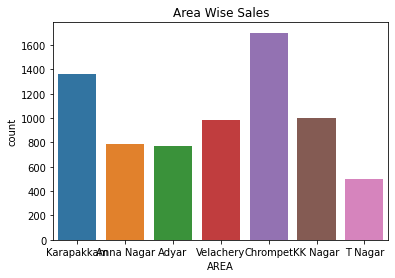

In [180]:
sns.countplot(data=df,x='AREA')
plt.title('Area Wise Sales')

MOST NO.OF.SALES AREA WISE:

1-CHROMPET

2-KARAPAKKAM

3-KK NAGAR

4-VELACHERY

5-ANNA NAGAR

6-ADAYAR

7-T NAGAR





Text(0.5, 1.0, 'Parking Facility')

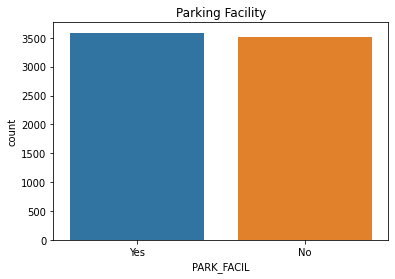

In [181]:
sns.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

Text(0.5, 1.0, 'Type of Building')

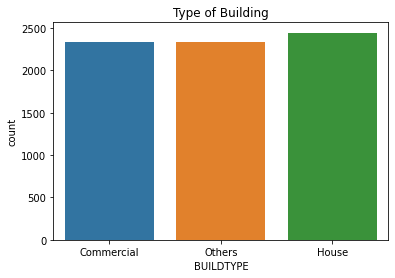

In [182]:
sns.countplot(data=df,x='BUILDTYPE')
plt.title('Type of Building')

Text(0.5, 1.0, 'Zones of Chennai')

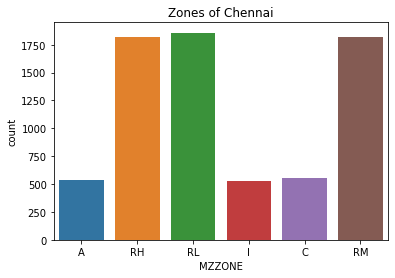

In [183]:
sns.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'No of Bedrooms')

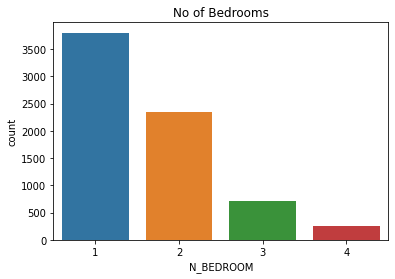

In [184]:
sns.countplot(df['N_BEDROOM'])
plt.title('No of Bedrooms')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'N_BATHROOM')

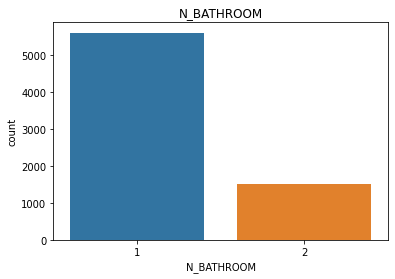

In [185]:
sns.countplot(df['N_BATHROOM'])
plt.title('N_BATHROOM')

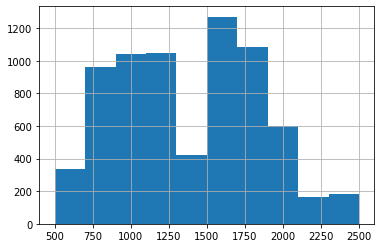

In [186]:
df.INT_SQFT.hist()

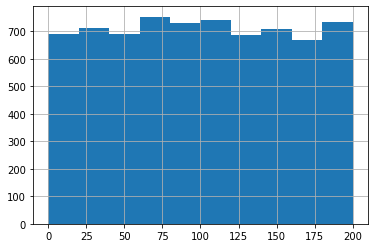

In [187]:
df.DIST_MAINROAD.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'SALES PRICE')

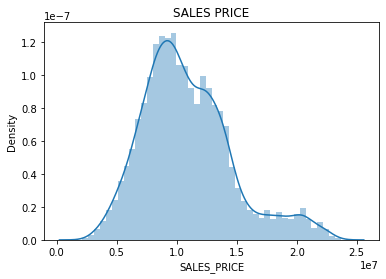

In [188]:
sns.distplot(df['SALES_PRICE'])
plt.title('SALES PRICE')

sales price
* RIGHT SKEWED

Text(0.5, 1.0, 'AGE_OF_BUILDING vs SALES_PRICE')

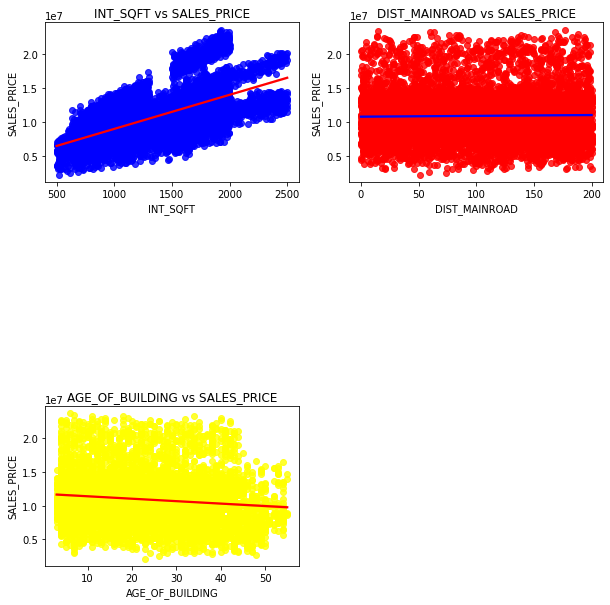

In [189]:
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.regplot(x = df["INT_SQFT"], y =df["SALES_PRICE"], scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("INT_SQFT vs SALES_PRICE")


plt.subplot(322)
sns.regplot(x = df["DIST_MAINROAD"], y =df["SALES_PRICE"], scatter_kws={"color" : "red"}, line_kws={"color":"blue"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(325)
sns.regplot(x = df["AGE_OF_BUILDING"], y =df["SALES_PRICE"], scatter_kws={"color" : "yellow"}, line_kws={"color":"red"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

*As INT SQFT increases, TOTAL SALE PRICE also increses.

In [190]:
temp =pd.DataFrame(df.groupby('AREA')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='SALES_PRICE',color='SALES_PRICE')

Text(0.5, 1.0, 'AREA vs SALES_PRICE')

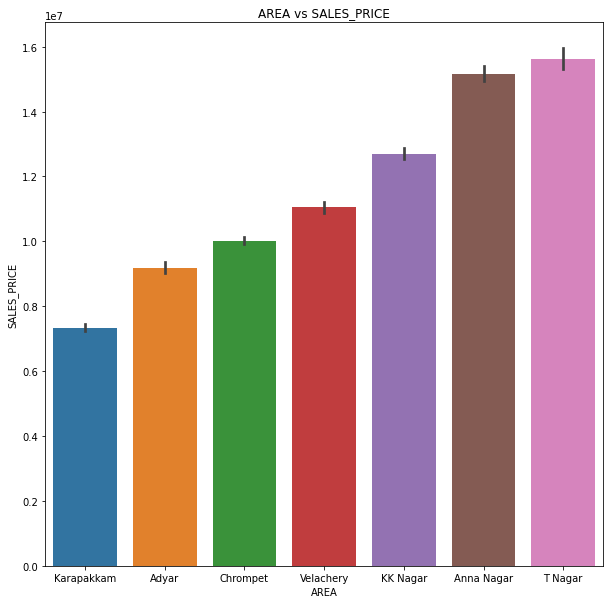

In [191]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

Text(0.5, 1.0, 'SALE_COND vs SALES_PRICE')

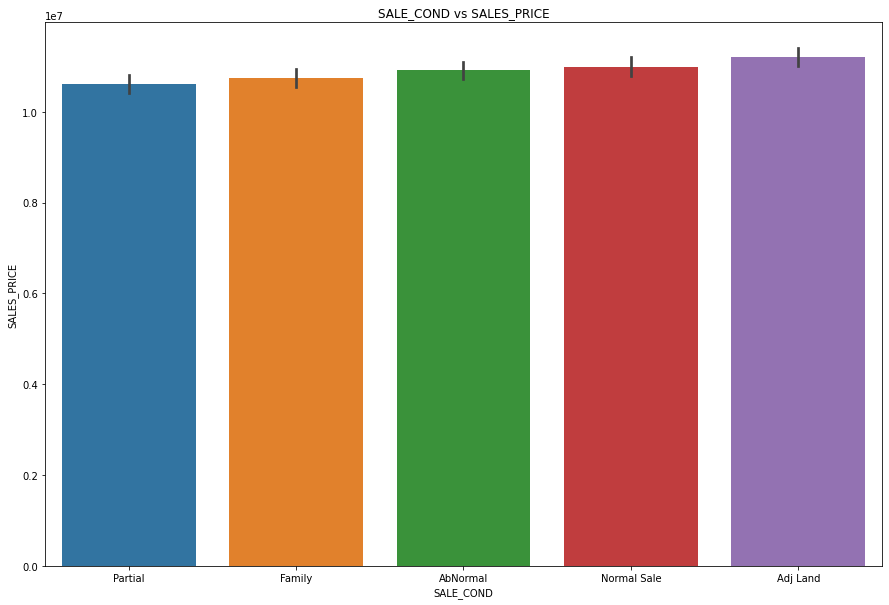

In [192]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

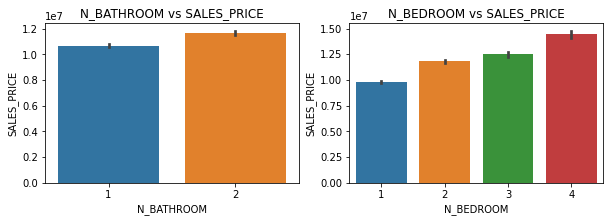

In [193]:
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

plt.subplot(322)
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

Text(0.5, 1.0, 'PARK_FACIL vs SALES_PRICE')

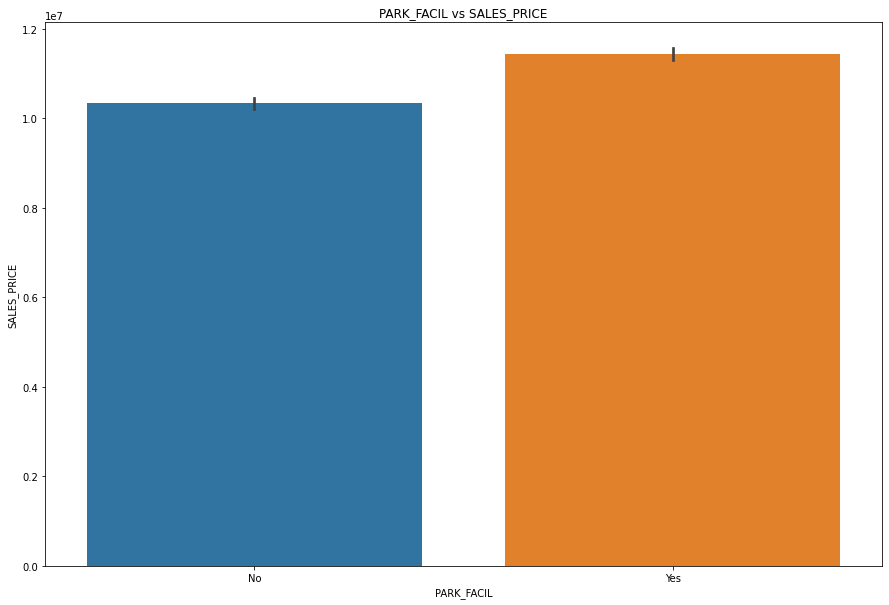

In [194]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

Text(0.5, 1.0, 'BUILDTYPE vs SALES_PRICE')

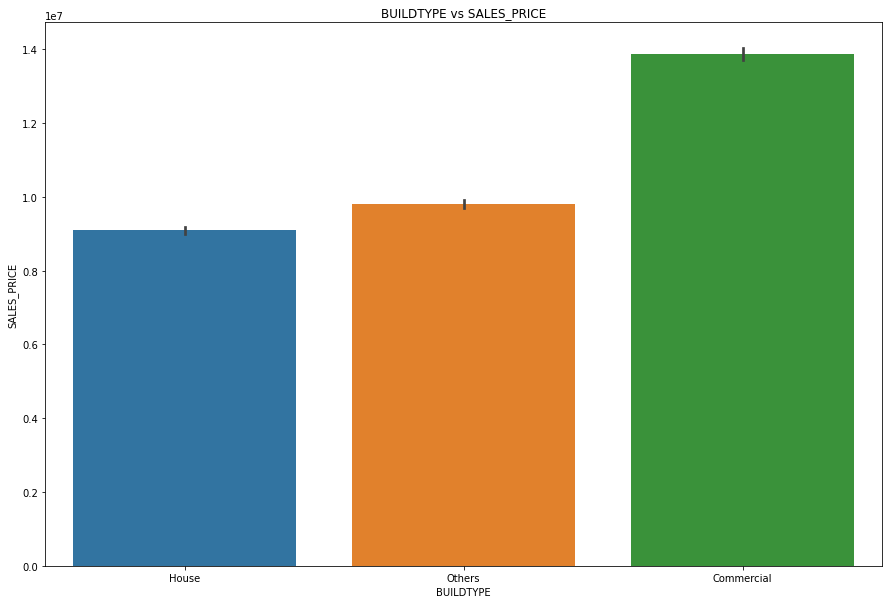

In [195]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

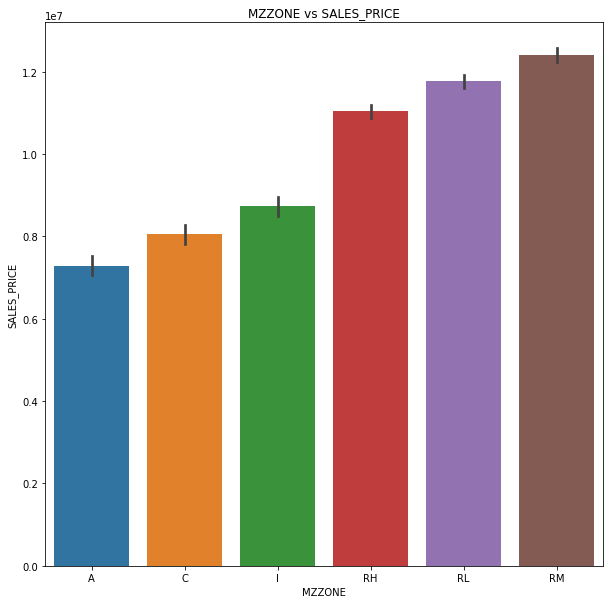

In [196]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

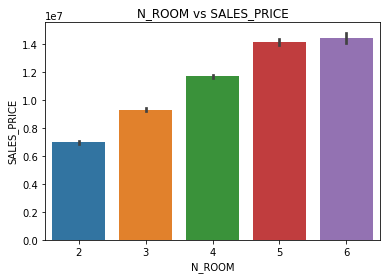

In [197]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

1-There is a linear relationship between Area, MZ Zone, N ROOM, N BEDROOM, N BATHROOM, STREET,SALE COND and TOTAL SALE PRICE.

2-For AREA, STREET, MZ ZONE, and SALE COND, we apply ordinal label encoding.

3-Although there is no linear relationship, BUILDTYPE does impact SALE PRICE. Therefore, for this column, we choose one hot encoding.

4-There is a linear relationship between UTILITY AVAIL and STREET and TOTAL SALE PRICE. but, having less of an impact than other features.

In [198]:
df1=df

In [199]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,356321,77042,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000,74063,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,No,Others,ELO,No Access,RM,208767,107060,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,346191,205551,10818480,8
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,317354,167028,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,425350,119098,8507000,31


In [220]:
df1["AREA"] = df1["AREA"].replace({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

df1["SALE_COND"] = df1["SALE_COND"].replace({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"Adj Land" : 4})

df1["UTILITY_AVAIL"] = df1["UTILITY_AVAIL"].replace({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3,"NoSewr": 2})

df1["STREET"] = df1["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})

df1["MZZONE"] = df1["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

In [221]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,131,1,1,3,2,1,3,1,0,380000,144400,7600000,43,1,0,0
1,5,1986,26,2,1,5,2,0,3,2,3,760122,304049,21717770,10,1,0,0
2,1,909,70,1,1,3,2,1,0,2,4,421094,92114,13159200,19,1,0,0
3,3,1855,14,3,2,5,1,0,NoSewr,1,2,356321,77042,9630290,21,0,0,1
4,0,1226,84,1,1,3,2,1,3,2,1,237000,74063,7406250,29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,0,0,5,208767,107060,5353000,49,0,0,1
7105,3,1897,52,3,2,5,1,1,1,0,3,346191,205551,10818480,8,0,0,1
7106,3,1614,152,2,1,4,3,0,1,2,2,317354,167028,8351410,28,0,1,0
7107,0,787,40,1,1,2,0,1,0,1,4,425350,119098,8507000,31,1,0,0


In [202]:
df1["PARK_FACIL"] = df1["PARK_FACIL"].replace({"No": 0, "Yes": 1})
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,0,1004,131,1,1,3,2,1,Commercial,3,1,0,380000,144400,7600000,43
1,5,1986,26,2,1,5,2,0,Commercial,3,2,3,760122,304049,21717770,10
2,1,909,70,1,1,3,2,1,Commercial,0,2,4,421094,92114,13159200,19
3,3,1855,14,3,2,5,1,0,Others,NoSewr,1,2,356321,77042,9630290,21
4,0,1226,84,1,1,3,2,1,Others,3,2,1,237000,74063,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,Others,0,0,5,208767,107060,5353000,49
7105,3,1897,52,3,2,5,1,1,Others,1,0,3,346191,205551,10818480,8
7106,3,1614,152,2,1,4,3,0,House,1,2,2,317354,167028,8351410,28
7107,0,787,40,1,1,2,0,1,Commercial,0,1,4,425350,119098,8507000,31


In [222]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_1,UTILITY_AVAIL_3,UTILITY_AVAIL_NoSewr
0,0,1004,131,1,1,3,2,1,1,0,380000,144400,7600000,43,0,0,0,1,0
1,5,1986,26,2,1,5,2,0,2,3,760122,304049,21717770,10,0,0,0,1,0
2,1,909,70,1,1,3,2,1,2,4,421094,92114,13159200,19,0,0,0,0,0
3,3,1855,14,3,2,5,1,0,1,2,356321,77042,9630290,21,0,1,0,0,1
4,0,1226,84,1,1,3,2,1,2,1,237000,74063,7406250,29,0,1,0,1,0


In [229]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AREA                   7109 non-null   int64
 1   INT_SQFT               7109 non-null   int64
 2   DIST_MAINROAD          7109 non-null   int64
 3   N_BEDROOM              7109 non-null   int64
 4   N_BATHROOM             7109 non-null   int64
 5   N_ROOM                 7109 non-null   int64
 6   SALE_COND              7109 non-null   int64
 7   PARK_FACIL             7109 non-null   int64
 8   STREET                 7109 non-null   int64
 9   MZZONE                 7109 non-null   int64
 10  REG_FEE                7109 non-null   int64
 11  COMMIS                 7109 non-null   int64
 12  SALES_PRICE            7109 non-null   int64
 13  AGE_OF_BUILDING        7109 non-null   int64
 14  BUILDTYPE_House        7109 non-null   uint8
 15  BUILDTYPE_Others       7109 non-null  

In [236]:
df1.to_csv("cleaned_data")

In [237]:
from sklearn.model_selection import train_test_split
X=df1.drop(['SALES_PRICE'],axis=1)
Y=df1['SALES_PRICE']

In [238]:
X.shape

(7109, 18)

In [245]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [246]:
x_train.shape

(5687, 18)

In [247]:
x_test.shape

(1422, 18)

LINEAR REGRESSION:

In [241]:
from sklearn.linear_model import LinearRegression

In [248]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [249]:
y_pred = lr.predict(x_test)
y_pred

array([10849566.32233019, 14381547.37940615, 15047351.14652299, ...,
        6757476.17205429,  8582759.85152142, 15931282.22951396])

In [250]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
6107,9866820,1.084957e+07
6964,14238410,1.438155e+07
6580,13547020,1.504735e+07
1036,14048900,1.405736e+07
1469,7439700,6.389456e+06
...,...,...
6279,12181500,1.180774e+07
6190,13491940,1.333889e+07
1828,6408750,6.757476e+06
5125,9387600,8.582760e+06


In [253]:
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 94.08 %


K-NEAREST NEIGHBOUR MODEL

In [254]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [255]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for i in [1,2,3,4,5,6,7,8,9,10,20,40,50,80,100]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))

K value  :  1  score :  0.940840970844072
K value  :  2  score :  0.940840970844072
K value  :  3  score :  0.940840970844072
K value  :  4  score :  0.940840970844072
K value  :  5  score :  0.940840970844072
K value  :  6  score :  0.940840970844072
K value  :  7  score :  0.940840970844072
K value  :  8  score :  0.940840970844072
K value  :  9  score :  0.940840970844072
K value  :  10  score :  0.940840970844072
K value  :  20  score :  0.940840970844072
K value  :  40  score :  0.940840970844072
K value  :  50  score :  0.940840970844072
K value  :  80  score :  0.940840970844072
K value  :  100  score :  0.940840970844072


In [256]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [257]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([11361536., 12448850., 12834900., ...,  6716184.,  9666562.,
       13471872.])

In [258]:
result_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
result_KNN

,Actual,Predicted
6107,9866820,11361536.0
6964,14238410,12448850.0
6580,13547020,12834900.0
1036,14048900,12893860.0
1469,7439700,7542783.0
...,...,...
6279,12181500,11688073.0
6190,13491940,12266940.0
1828,6408750,6716184.0
5125,9387600,9666562.0


In [259]:
from sklearn import metrics
KNN1 = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 91.42 %


DECISION TREE MODEL

In [260]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [262]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train, y_train) # the model is trained
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.4796430334420182
DEPTH:  2 R2-Score:  0.6980650936630719
DEPTH:  3 R2-Score:  0.7963020647040953
DEPTH:  4 R2-Score:  0.8473374202576537
DEPTH:  5 R2-Score:  0.8776612986978763
DEPTH:  6 R2-Score:  0.9088003096400434
DEPTH:  7 R2-Score:  0.9281249162959355
DEPTH:  8 R2-Score:  0.9392079775064403
DEPTH:  9 R2-Score:  0.944802198133682
DEPTH:  10 R2-Score:  0.9469085036524886
DEPTH:  20 R2-Score:  0.9412325073102863
DEPTH:  30 R2-Score:  0.9421099056607908
DEPTH:  40 R2-Score:  0.940770214321315
DEPTH:  50 R2-Score:  0.9419151979011229
DEPTH:  60 R2-Score:  0.940919407068742
DEPTH:  100 R2-Score:  0.9412593102763731


In [263]:
dt = DecisionTreeRegressor(max_depth=30)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [264]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([10369970., 13539080., 13397330., ...,  7725875.,  8569080.,
       13753510.])

In [265]:
result_dt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
result_dt

,Actual,Predicted
6107,9866820,10369970.0
6964,14238410,13539080.0
6580,13547020,13397330.0
1036,14048900,13231850.0
1469,7439700,7778900.0
...,...,...
6279,12181500,13282450.0
6190,13491940,14088220.0
1828,6408750,7725875.0
5125,9387600,8569080.0


In [266]:
from sklearn import metrics
dt1 = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 94.33 %


RANDOM FOREST MODEL:

In [267]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [268]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [269]:
y_pred_rf = rf.predict(x_test)

In [270]:
result_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_rf

,Actual,Predicted
6107,9866820,1.001958e+07
6964,14238410,1.347230e+07
6580,13547020,1.395263e+07
1036,14048900,1.320489e+07
1469,7439700,7.880770e+06
...,...,...
6279,12181500,1.210166e+07
6190,13491940,1.297433e+07
1828,6408750,7.176759e+06
5125,9387600,9.325831e+06


In [271]:
from sklearn import metrics
rf1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 96.48 %


XG-BOOST MODEL:

In [272]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [273]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train)))

Learning rate :  0.01  Train score :  -0.3985068114983954  Cross-Val score :  -0.4046977308339638
Learning rate :  0.02  Train score :  0.7261455987276167  Cross-Val score :  0.7214977542686062
Learning rate :  0.03  Train score :  0.9018096836036481  Cross-Val score :  0.8967842165356139
Learning rate :  0.04  Train score :  0.9360534513821137  Cross-Val score :  0.9299808496545005
Learning rate :  0.05  Train score :  0.9462759048164425  Cross-Val score :  0.9410782669941872
Learning rate :  0.1  Train score :  0.9707392157963916  Cross-Val score :  0.9631030367078643
Learning rate :  0.11  Train score :  0.9727679776541042  Cross-Val score :  0.9659074793120505
Learning rate :  0.12  Train score :  0.9747687385536996  Cross-Val score :  0.9689460580932845
Learning rate :  0.13  Train score :  0.9767704985276757  Cross-Val score :  0.9702728026807531
Learning rate :  0.14  Train score :  0.978876715233048  Cross-Val score :  0.9718710256012433
Learning rate :  0.15  Train score :  0.

In [274]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) 
xg_model.score(x_test, y_test) 

0.9925023399523739

In [275]:
XG_pred= model.predict(x_test)
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
result_XG

,Actual,Predicted
6107,9866820,9419506.0
6964,14238410,14345362.0
6580,13547020,13652424.0
1036,14048900,14041888.0
1469,7439700,7371953.0
...,...,...
6279,12181500,11969422.0
6190,13491940,13235816.0
1828,6408750,6224211.5
5125,9387600,9488432.0


In [276]:
from sklearn import metrics
XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 98.94 %
